# Tutorial

In [1]:
(ns opencv4.tutorial
 (:require
   [opencv4.utils :as u]
   [opencv4.core :refer :all]))

nil

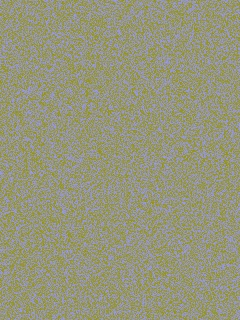

In [2]:
(def image (new-mat 320 240 CV_8UC3))
(doseq [row (range 0 (.rows image))]
  (doseq [col (range 0 (.cols image))]
    (.put image row col (byte-array [(rand 250) 150 150]))))
(u/>>> image)

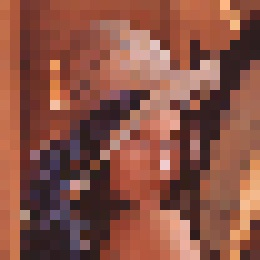

In [3]:
; mosaic
(->
  "resources/images/lena.png"
  (imread)
  (u/resize-by 0.5)
  (resize! (new-size ) 0.1 0.1 INTER_NEAREST)
  (resize! (new-size) 10.0 10.0 INTER_NEAREST)
  (u/>>>))

## denoising

_this is super slow_

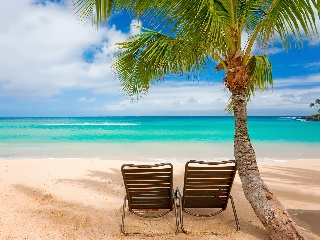

In [9]:
(->
  "resources/summer.png"
  (imread)
  (u/resize-by 0.2)
  (fast-nl-means-denoising!)
  (u/>>>))

# blurring

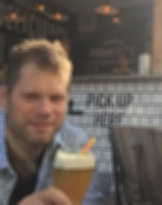

In [10]:
(->
  "resources/nico.jpg"
  (imread)
  (u/resize-by 0.3)
  (blur! (new-size 5 5))
  (u/>>>))

## grey scale

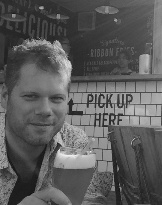

In [11]:
(->
  "resources/nico.jpg"
  (imread)
  (u/resize-by 0.3)
  (cvt-color! COLOR_RGB2GRAY)
  (u/>>>))

## laplacian

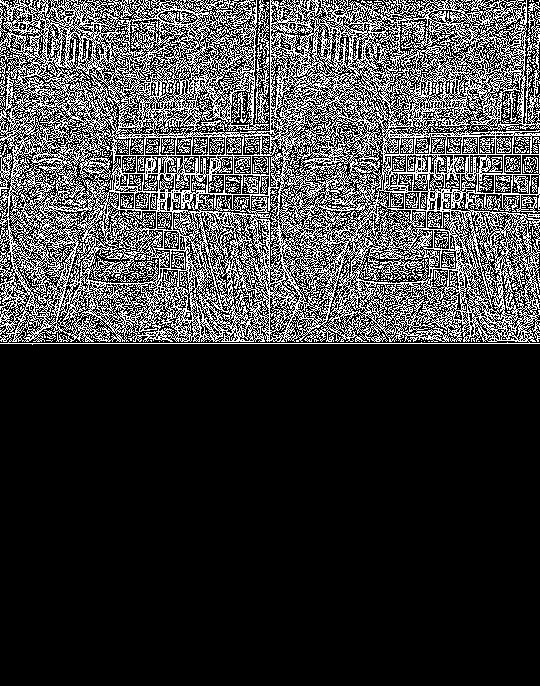

In [12]:
(->
  (imread "resources/nico.jpg" 0)
  (laplacian! 10)
  (u/>>>))

## levels

_this is very slow_

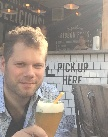

In [29]:
(def im (-> "resources/nico.jpg" imread (u/resize-by 0.2)))
(def n 100)
(def sz (.size im))

(doseq [i (range 0 (.-height sz ))]
  (doseq [j (range 0 (.-width sz ))]
  (let [pixel (.get im i j)]
    (aset pixel 0 (+ (aget pixel 0) (/ n 2)))
    (aset pixel 1 (+ (aget pixel 1) (/ n 2)))
    (aset pixel 2 (+ (aget pixel 2) (/ n 2)))
    (.put im i j pixel))))

(u/>>> im)

## sampling

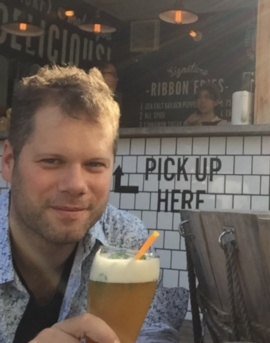

In [30]:
; downsample the image
(def original (imread "resources/nico.jpg"))
(.size original)
(def im (clone original))
(pyr-down! im)
(u/>>> im)

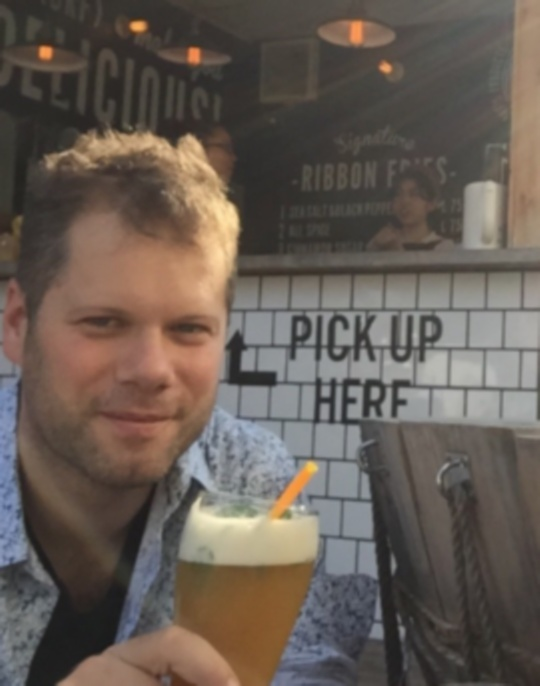

In [31]:
; upsample the image
(pyr-up! im)
(u/>>> im)

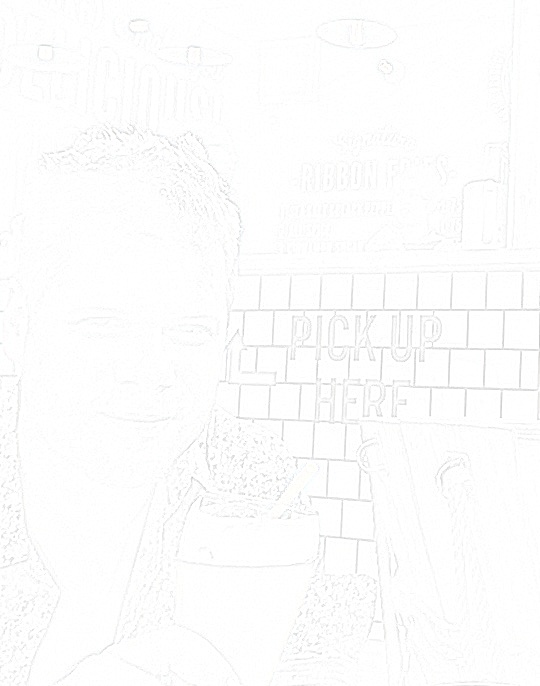

In [32]:
; resize to the same size as the original
(resize! im (new-size 540 686))

; subtract original: this technique helps getting a nice outline of the picture
(subtract im original im)
(-> im (bitwise-not!) u/>>>)
; (-> im u/>>>)

## thresholds

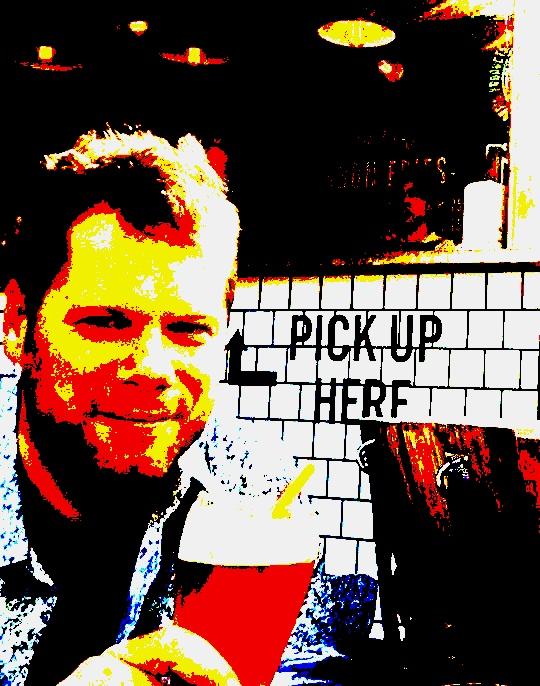

In [33]:
; binary
(->
  "resources/nico.jpg"
  (imread)
  (threshold! 100 240 THRESH_BINARY)
  (u/>>>))


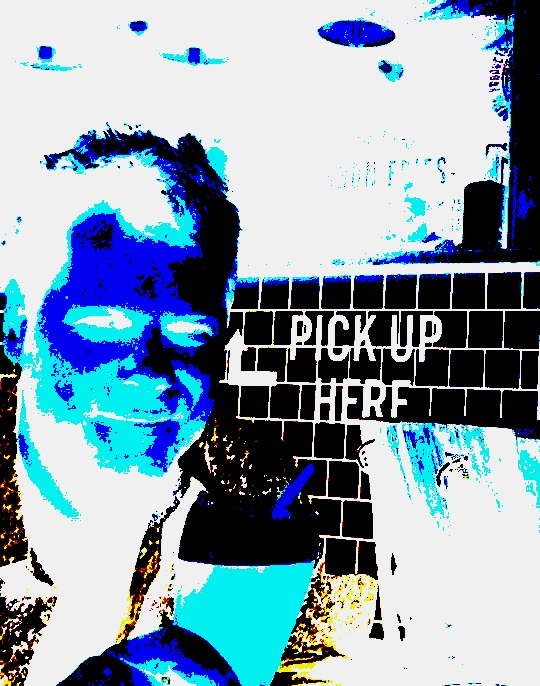

In [27]:
; binary inv
(->
  "resources/nico.jpg"
  (imread)
  (threshold! 100 240 THRESH_BINARY_INV)
  (u/>>>))

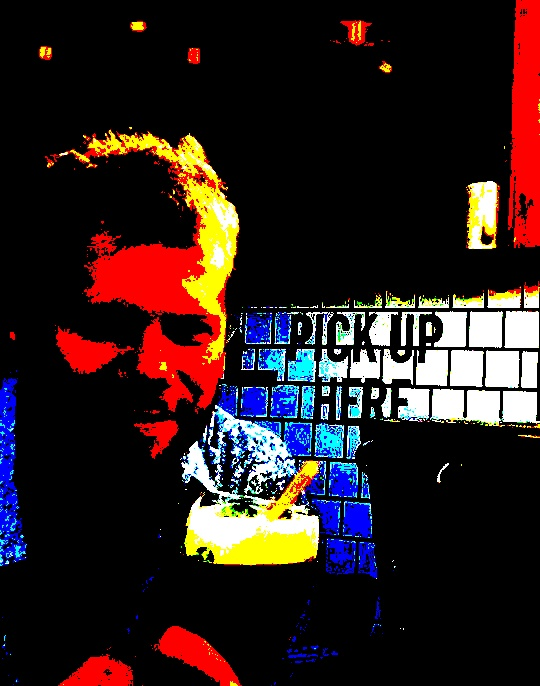

In [28]:
(->
  "resources/nico.jpg"
  (imread)
  (threshold! 150 255 THRESH_BINARY)
  (u/>>>))

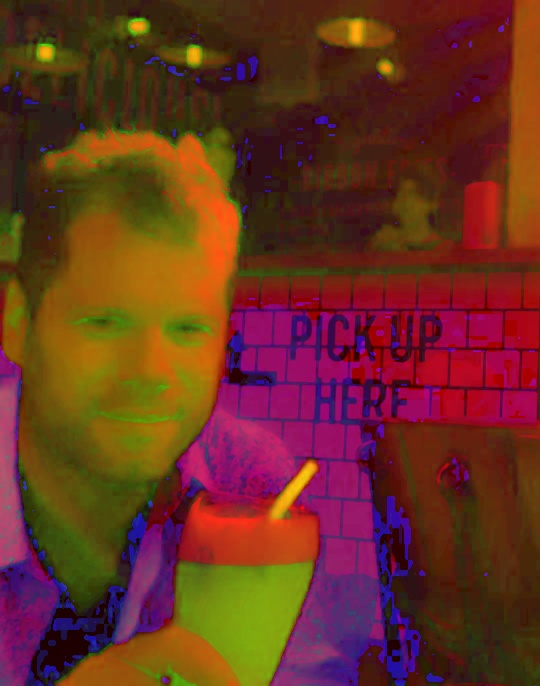

In [34]:
; http://qiita.com/gutugutu3030/items/3907530ee49433420b37

;
; original gaussian blur on image
;
(->
  "resources/nico.jpg"
  (imread)
  (cvt-color! COLOR_BGR2HSV)
  (median-blur! 3)
  (u/>>>))


In [ ]:

(->
  "resources/nico.jpg"
  (imread)
  (cvt-color! COLOR_BGR2RGBA)
  (median-blur! 3)
  (u/>>>))


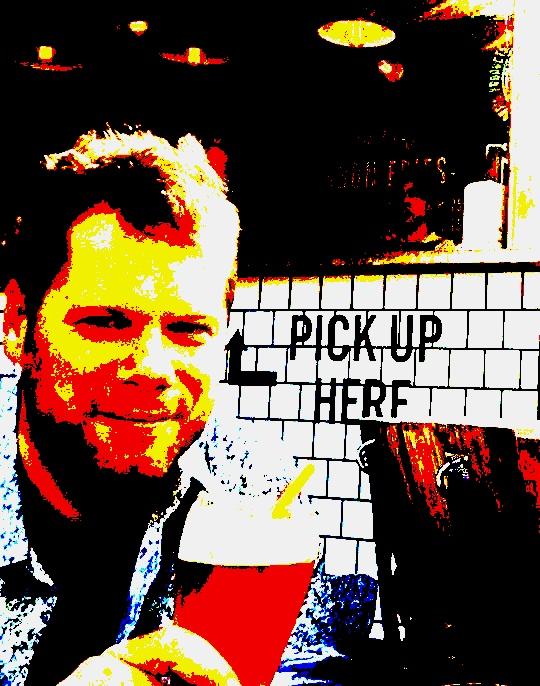

In [35]:

;
; nice threshold on above gaussian
;
(->
  "resources/nico.jpg"
  (imread)
  (threshold! 100 240 THRESH_BINARY)
  (u/>>>))

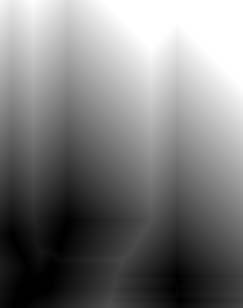

In [36]:
;
; Transformation
;
; https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
(->
  "resources/nico.jpg"
  (imread CV_8UC3)
  (u/resize-by 0.9)
  (threshold! 30 240 THRESH_BINARY)
  (distance-transform! DIST_L1 5)
  (u/>>>))